In [1]:
import os

from ml.eval import eval_model

print(os.getcwd())
os.chdir('/home/jelinek/recetox/')

from ml.pipeline import ModelPipeline

from tensorflow import keras

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import schedules

from tensorflow.keras.callbacks import ReduceLROnPlateau

from cfg import *

from livelossplot import PlotLossesKerasTF

/home/jelinek/recetox/src


In [2]:
class MySimpleCnn_Feit(ModelPipeline):

    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

        self.model = self.get_model()
        self.set_name("MySimpleCnn_Feit-data_non_norm_data")
        self.set_num_of_training_epochs(200)
        self.set_batch_size(16)

        lr_schedule = schedules.ExponentialDecay(
            initial_learning_rate=1e-2,
            decay_steps=TRAINING_EXAMPLES_COUNT // self.get_batch_size() * 30,
            decay_rate=0.1,
            staircase=True)

        self.optimizer = Adam(
            # learning_rate=0.1,
            learning_rate=lr_schedule,
            beta_1=0.99,
            beta_2=0.9999)

    @staticmethod
    def get_model():
        inputs = keras.Input(shape=(256, 256, 3))

        x = keras.layers.Conv2D(filters=32, kernel_size=5, strides=(1, 1), padding='same')(inputs)
        x = keras.layers.MaxPooling2D()(x)
        for i in range(7):
            #x = keras.layers.Dropout(rate=0.2)(x)
            x = keras.layers.Conv2D(filters=64 * (2 ** (i // 4)), kernel_size=5, strides=(1, 1), padding='same')(x)
            x = keras.layers.MaxPooling2D(padding='same', pool_size=(2, 2))(x)
            x = keras.layers.BatchNormalization(axis=3, epsilon=1.001e-5)(x)

        x = keras.layers.Flatten()(x)
        outputs = keras.layers.Dense(units=12, activation='softmax')(x)

        model = keras.Model(inputs, outputs, name='MySimpleCnn_Feit-data')
        model.summary()
        return model

    def _train_model(self, data_train, data_valid):

        reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                                      patience=30, min_lr=1e-4, verbose=1,
                                      cooldown=20)

        self.model.fit(data_train,
                       steps_per_epoch=TRAINING_EXAMPLES_COUNT // self.get_batch_size(),
                       epochs=self.get_num_of_training_epochs(),
                       shuffle=True,
                       validation_data=data_valid,
                       validation_freq=1,
                       verbose=1,
                       callbacks=[self.tensorboard, reduce_lr, PlotLossesKerasTF()])

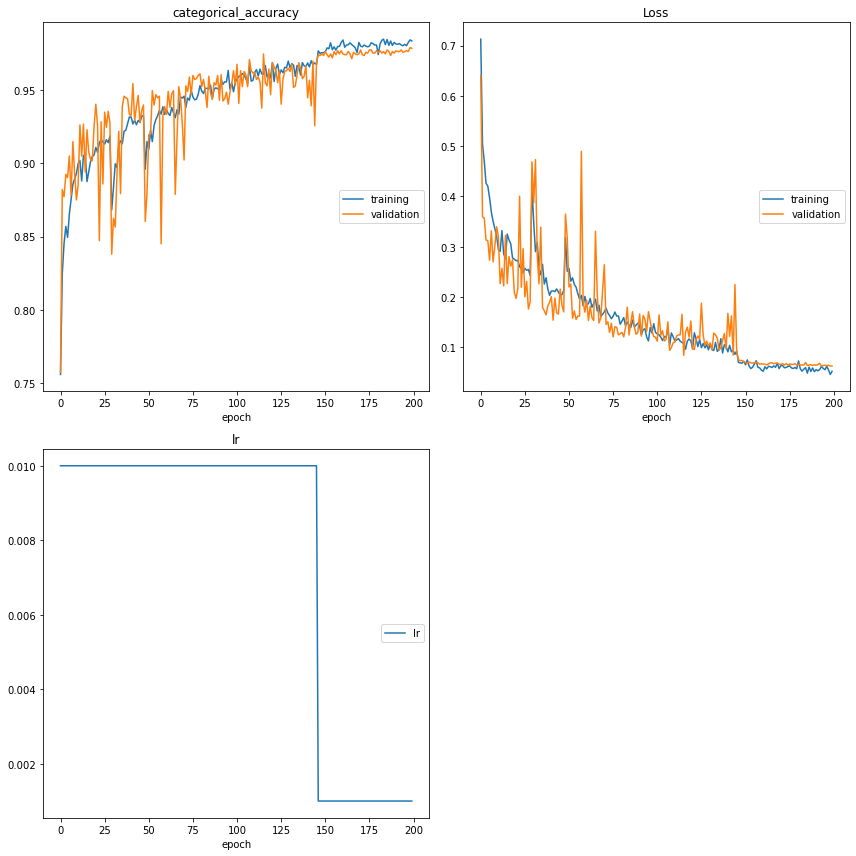

categorical_accuracy
	training         	 (min:    0.756, max:    0.985, cur:    0.984)
	validation       	 (min:    0.757, max:    0.979, cur:    0.979)
Loss
	training         	 (min:    0.046, max:    0.713, cur:    0.053)
	validation       	 (min:    0.063, max:    0.641, cur:    0.063)
lr
	lr               	 (min:    0.001, max:    0.010, cur:    0.001)
Found 1833 images belonging to 12 classes.
31/31 [==============================] - 2s 54ms/step - loss: 0.1073 - categorical_accuracy: 0.9577

In [3]:
pipeline = MySimpleCnn_Feit(train_data_dir='data/Feit_colon-annotation-tiles-256/data_train/',
                        valid_data_dir='data/Feit_colon-annotation-tiles-256/data_valid/')

pipeline.execute_pipeline(perform_validation=True, perform_test_segmentation=False)

In [4]:
pipeline.save_pipeline()

Found 1833 images belonging to 12 classes.
115/115 [==============================] - 14s 81ms/step - loss: 0.0629 - categorical_accuracy: 0.9787

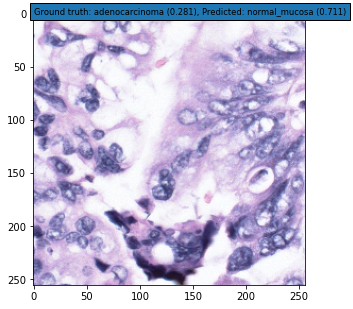

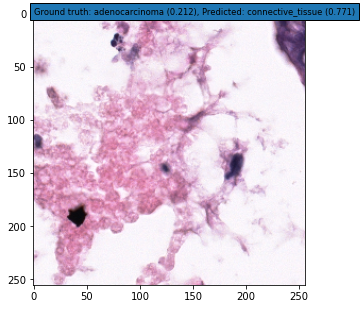

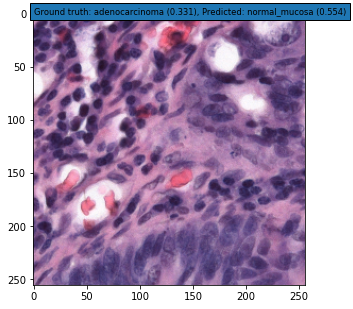

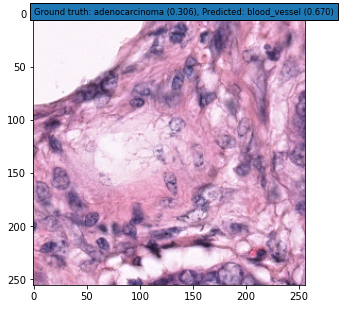

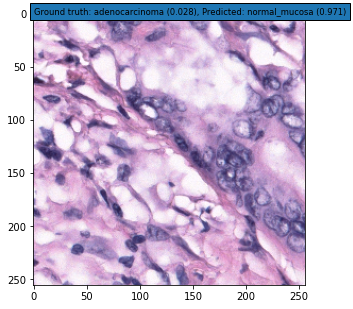

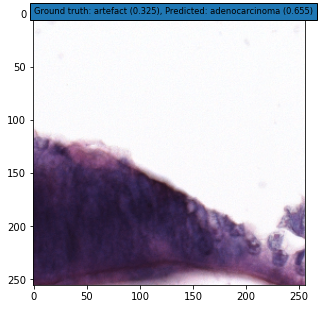

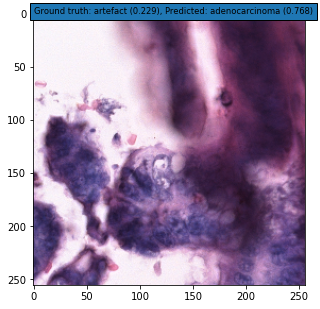

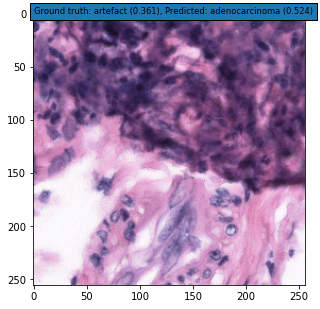

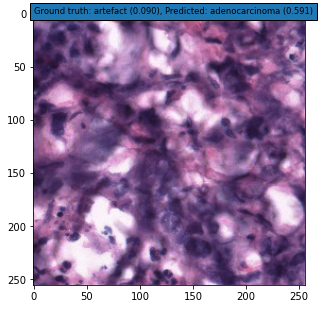

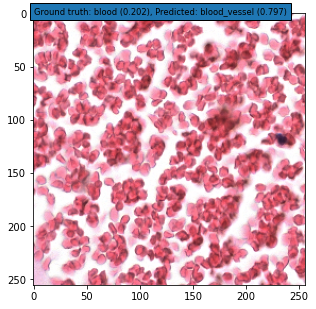

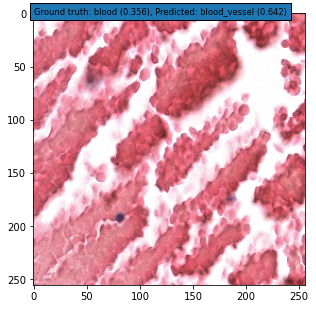

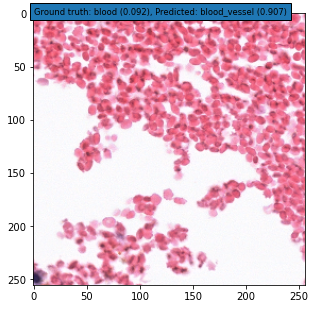

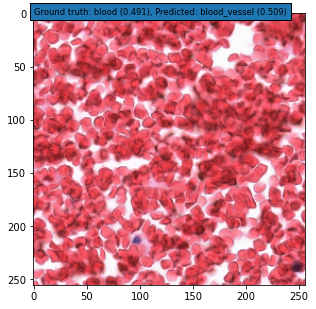

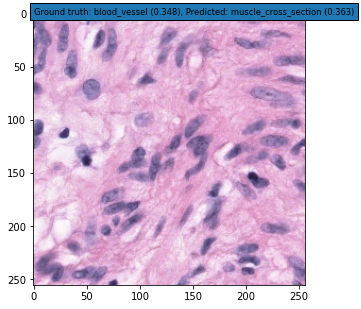

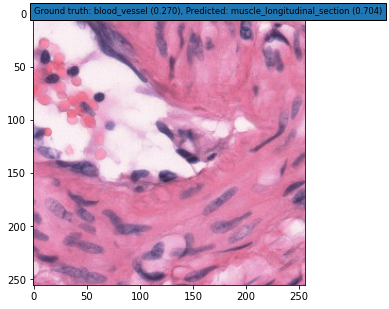

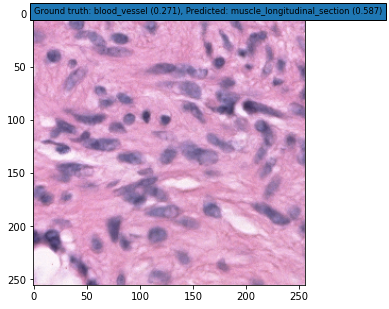

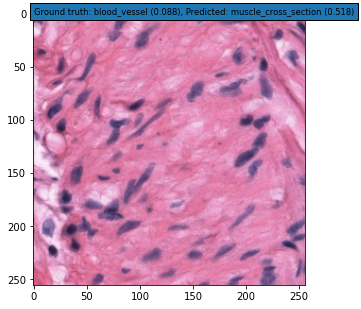

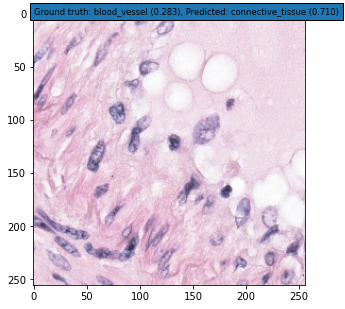

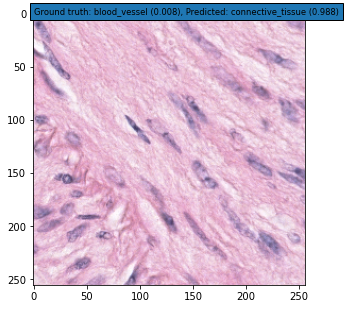

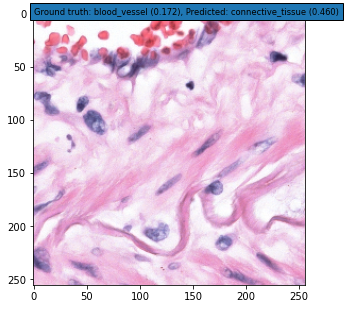

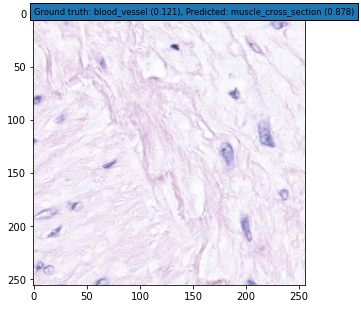

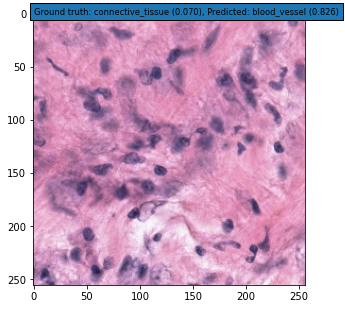

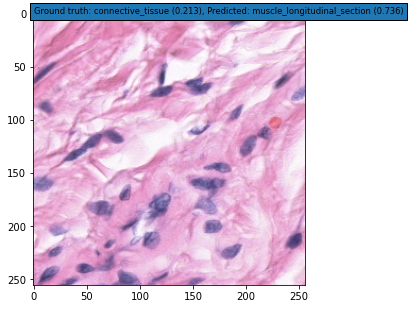

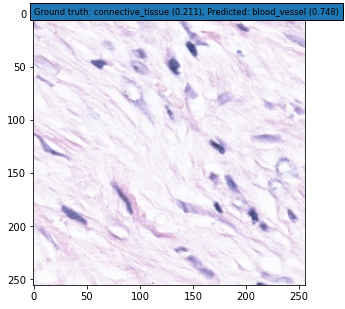

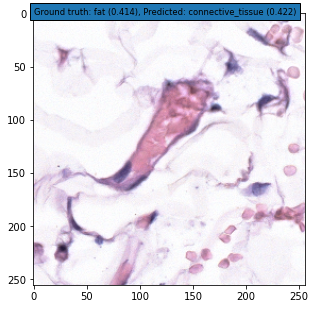

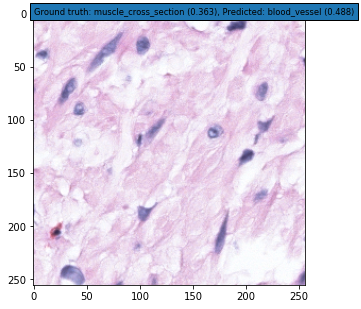

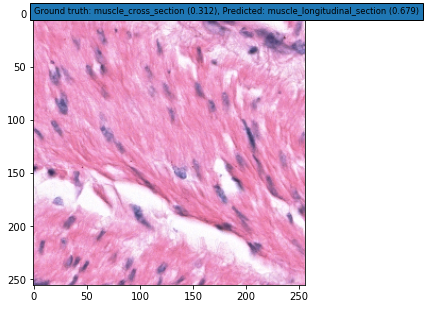

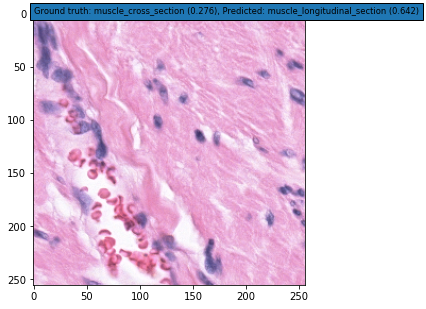

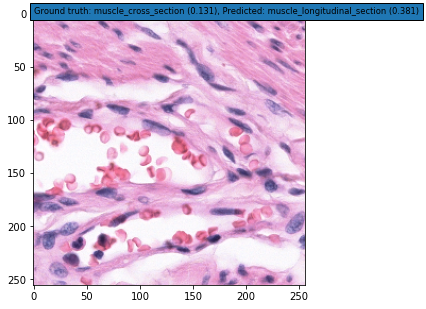

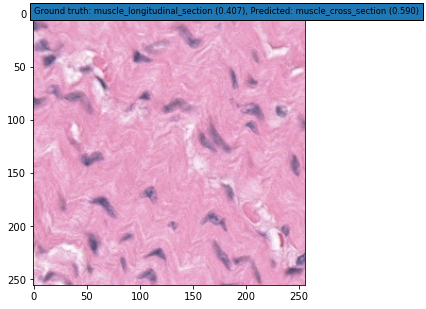

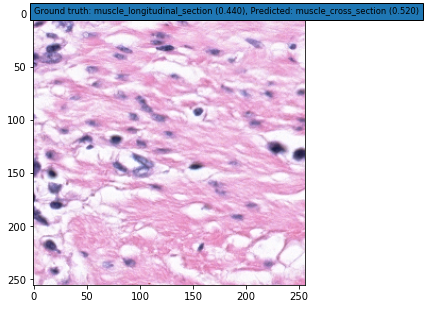

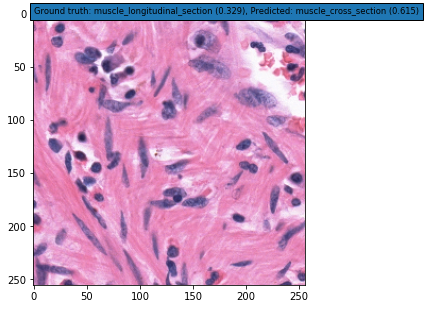

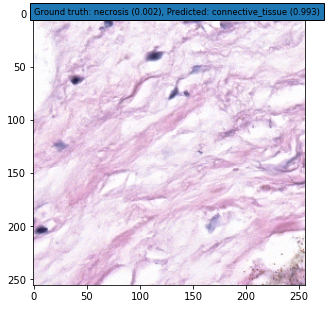

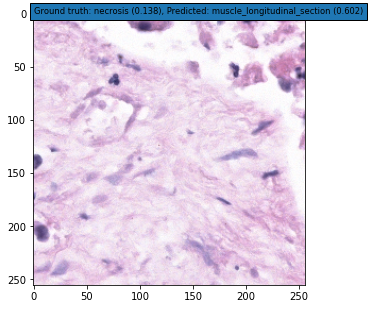

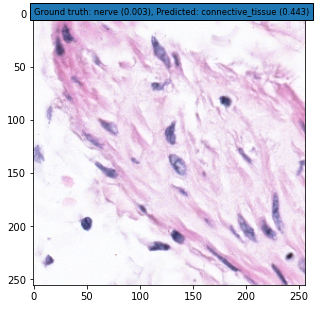

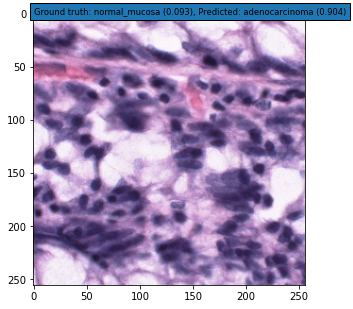

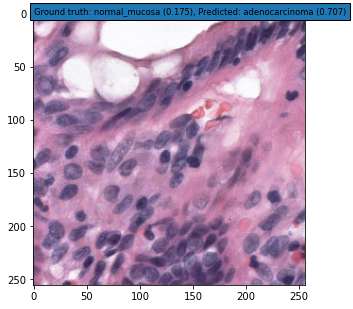

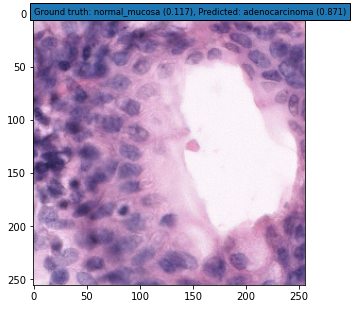

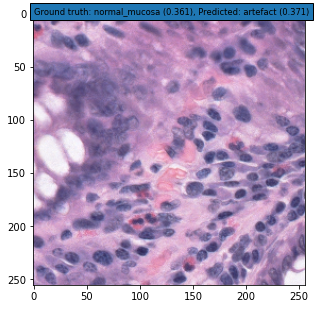

In [3]:
pipeline = ModelPipeline.load_pipeline(pipeline_name='MySimpleCnn_Feit-data_non_norm_data')
eval_model(pipeline.model,
            pipeline.get_data_loader_training(),
            print_confusion_matrix=True,
            show_misclassified=True)

In [4]:
pipeline.perform_segmentation(step=10)

Performing segmentation of slide #1
0 0
500 0
1000 0
1500 0
2000 0
2500 0
3000 0
3500 0
4000 0
4500 0
Performing segmentation of slide #2
0 0
500 0
1000 0
1500 0
2000 0
2500 0
3000 0
3500 0
4000 0
4500 0
Performing segmentation of slide #3
0 0
500 0
1000 0
1500 0
2000 0
2500 0
3000 0
3500 0
4000 0
4500 0
Performing segmentation of slide #4
0 0
500 0
1000 0
1500 0
2000 0
2500 0
3000 0
3500 0
4000 0
4500 0
Performing segmentation of slide #5
0 0
500 0
1000 0
1500 0
2000 0
2500 0
3000 0
3500 0
4000 0
4500 0
Performing segmentation of slide #6
0 0
500 0
1000 0
1500 0
2000 0
2500 0
3000 0
3500 0
4000 0
4500 0
Performing segmentation of slide #7
0 0
500 0
1000 0
1500 0
2000 0
2500 0
3000 0
3500 0
4000 0
4500 0
Performing segmentation of slide #8
0 0
500 0
1000 0
1500 0
2000 0
2500 0
3000 0
3500 0
4000 0
4500 0
Performing segmentation of slide #9
0 0
500 0
1000 0
1500 0
2000 0
2500 0
3000 0
3500 0
4000 0
4500 0
Performing segmentation of slide #10
0 0
500 0
1000 0
1500 0
2000 0
2500 0
3000 0
